In [1]:
!pip install --upgrade scikit-learn=="1.2.2"

In [2]:
import os
import sys
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import librosa 
import librosa.display

from IPython.display import Audio
plt.style.use('seaborn-white')

/tmp/ipykernel_31/683567009.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [3]:
TESS = "../input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "../input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
SAVEE = "../input/surrey-audiovisual-expressed-emotion-savee/ALL/"
CREMA = "../input/cremad/AudioWAV/"

In [4]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('unknown') 
    path.append(SAVEE + i)

# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
print('SAVEE dataset')
SAVEE_df.head()

SAVEE dataset


labels                                               path
0    happy  ../input/surrey-audiovisual-expressed-emotion-...
1     fear  ../input/surrey-audiovisual-expressed-emotion-...
2    happy  ../input/surrey-audiovisual-expressed-emotion-...
3  disgust  ../input/surrey-audiovisual-expressed-emotion-...
4    angry  ../input/surrey-audiovisual-expressed-emotion-...

In [5]:
# Get the data location for TESS
path = []
emotion = []
dir_list = os.listdir(TESS)

for i in dir_list:
    fname = os.listdir(TESS + i)   
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
#TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
print('TESS dataset')
TESS_df.head()

TESS dataset


labels                                               path
0   fear  ../input/toronto-emotional-speech-set-tess/tes...
1   fear  ../input/toronto-emotional-speech-set-tess/tes...
2   fear  ../input/toronto-emotional-speech-set-tess/tes...
3   fear  ../input/toronto-emotional-speech-set-tess/tes...
4   fear  ../input/toronto-emotional-speech-set-tess/tes...

In [6]:
# Importing datas from RAVDESS
dir = os.listdir(RAV)

males = []
females = [] 
        
for actor in dir:
       
    files = os.listdir(RAV + actor)
        
    for file in files: 
        part = file.split('.')[0]
        part = part.split("-")           
            
        temp = int(part[6])        
                
        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'
            
        if temp%2 == 0:
            path = (RAV + actor + '/' + file)
            #emotion = 'female_'+emotion
            females.append([emotion, path]) 
        else:
            path = (RAV + actor + '/' + file)
             #emotion = 'male_'+emotion
            males.append([emotion, path])   
    
   
RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['labels', 'path']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['labels', 'path']

print('RAVDESS datasets')
RavFemales_df.head()

RAVDESS datasets


labels                                               path
0  surprise  ../input/ravdess-emotional-speech-audio/audio_...
1   neutral  ../input/ravdess-emotional-speech-audio/audio_...
2   disgust  ../input/ravdess-emotional-speech-audio/audio_...
3   disgust  ../input/ravdess-emotional-speech-audio/audio_...
4   neutral  ../input/ravdess-emotional-speech-audio/audio_...

In [7]:
RavMales_df.head()

labels                                               path
0     calm  ../input/ravdess-emotional-speech-audio/audio_...
1    angry  ../input/ravdess-emotional-speech-audio/audio_...
2    happy  ../input/ravdess-emotional-speech-audio/audio_...
3     calm  ../input/ravdess-emotional-speech-audio/audio_...
4  disgust  ../input/ravdess-emotional-speech-audio/audio_...

In [8]:
files = os.listdir(CREMA)

female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
males = []
females = []

for file in files: 
    part = file.split('_')   
    
    if part[2] == 'SAD':
        emotion = 'sad'
    elif part[2] == 'ANG':
        emotion = 'angry'
    elif part[2] == 'DIS':
        emotion = 'disgust'
    elif part[2] == 'FEA':
        emotion = 'fear'
    elif part[2] == 'HAP':
        emotion = 'happy'
    elif part[2] == 'NEU':
        emotion = 'neutral'  
    else:
        emotion = 'unknown'
        
    if int(part[0]) in female:
        path = (CREMA + '/' + file)
        #emotion = 'female_'+emotion
        females.append([emotion, path]) 
    else:
        path = (CREMA + '/' + file)
        #emotion = 'male_'+emotion
        males.append([emotion, path])   
    
CremaFemales_df = pd.DataFrame(females)
CremaFemales_df.columns = ['labels', 'path']

CremaMales_df = pd.DataFrame(males)
CremaMales_df.columns = ['labels', 'path']
    
print('CREMA datasets')
CremaFemales_df.head()

CREMA datasets


labels                                           path
0  disgust  ../input/cremad/AudioWAV//1028_TSI_DIS_XX.wav
1    happy  ../input/cremad/AudioWAV//1075_IEO_HAP_LO.wav
2    happy  ../input/cremad/AudioWAV//1084_ITS_HAP_XX.wav
3      sad  ../input/cremad/AudioWAV//1004_WSI_SAD_XX.wav
4    happy  ../input/cremad/AudioWAV//1030_DFA_HAP_XX.wav

In [9]:
CremaMales_df.head()

labels                                           path
0  disgust  ../input/cremad/AudioWAV//1067_IWW_DIS_XX.wav
1  disgust  ../input/cremad/AudioWAV//1066_TIE_DIS_XX.wav
2  disgust  ../input/cremad/AudioWAV//1027_DFA_DIS_XX.wav
3    happy  ../input/cremad/AudioWAV//1032_IEO_HAP_HI.wav
4      sad  ../input/cremad/AudioWAV//1023_TIE_SAD_XX.wav

In [10]:
# Now lets merge all the dataframe
Males = pd.concat([SAVEE_df, RavMales_df, CremaMales_df], axis = 0)
Males.to_csv("males_emotions_df.csv", index = False)

Females = pd.concat([TESS_df, RavFemales_df, CremaFemales_df], axis = 0)
Females.to_csv("females_emotions_df.csv", index = False)

In [11]:
Males.head()

labels                                               path
0    happy  ../input/surrey-audiovisual-expressed-emotion-...
1     fear  ../input/surrey-audiovisual-expressed-emotion-...
2    happy  ../input/surrey-audiovisual-expressed-emotion-...
3  disgust  ../input/surrey-audiovisual-expressed-emotion-...
4    angry  ../input/surrey-audiovisual-expressed-emotion-...

In [12]:
Males.count()

labels    5130
path      5130
dtype: int64

In [13]:
Females.head()

labels                                               path
0   fear  ../input/toronto-emotional-speech-set-tess/tes...
1   fear  ../input/toronto-emotional-speech-set-tess/tes...
2   fear  ../input/toronto-emotional-speech-set-tess/tes...
3   fear  ../input/toronto-emotional-speech-set-tess/tes...
4   fear  ../input/toronto-emotional-speech-set-tess/tes...

In [14]:
Females.count()

labels    7032
path      7032
dtype: int64

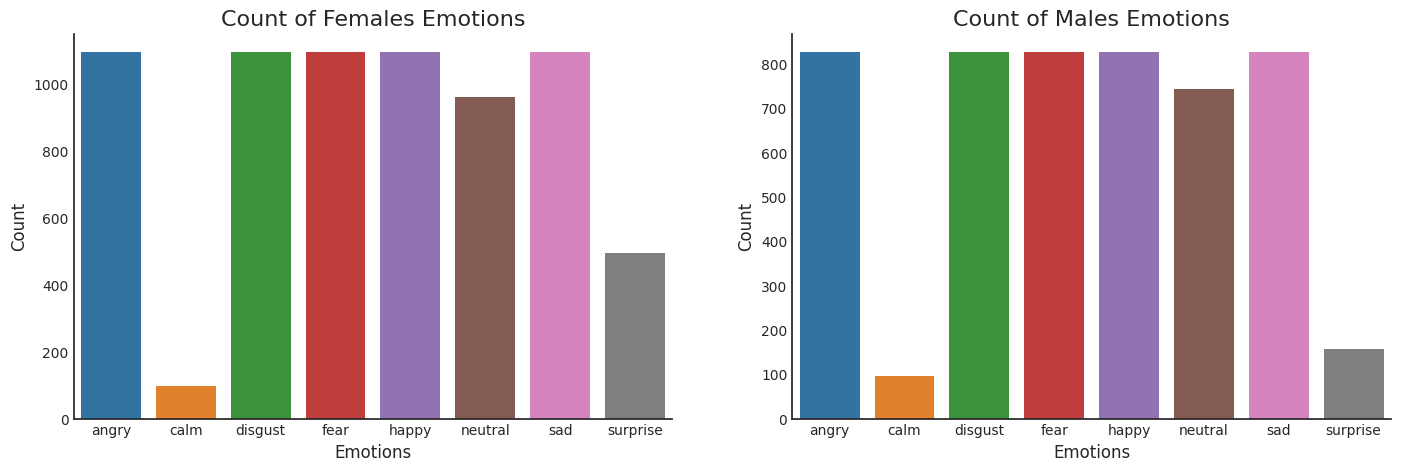

In [16]:
order = ['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

fig = plt.figure(figsize=(17, 5))

fig.add_subplot(121)
plt.title('Count of Females Emotions', size=16)
sns.countplot(x='labels', data=Females, order=order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

fig.add_subplot(122)
plt.title('Count of Males Emotions', size=16)
sns.countplot(x='labels', data=Males, order=order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()


In [17]:
def create_waveshow(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'waveshow for audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

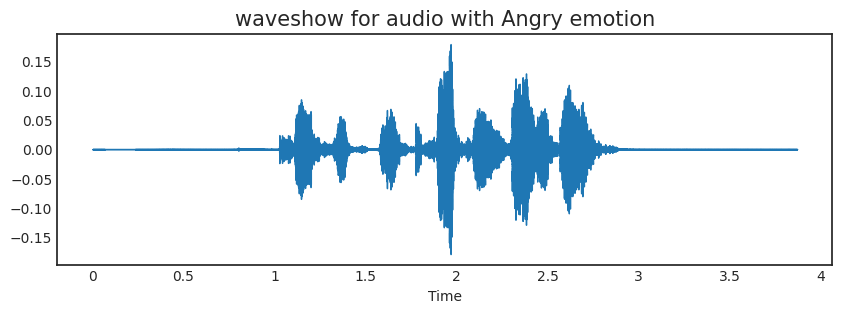

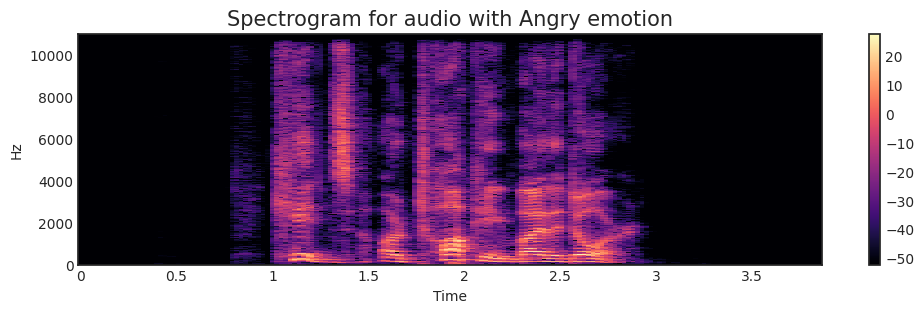

In [18]:
emotion = 'Angry'
path = '../input/ravdess-emotional-speech-audio/Actor_01/03-01-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveshow(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


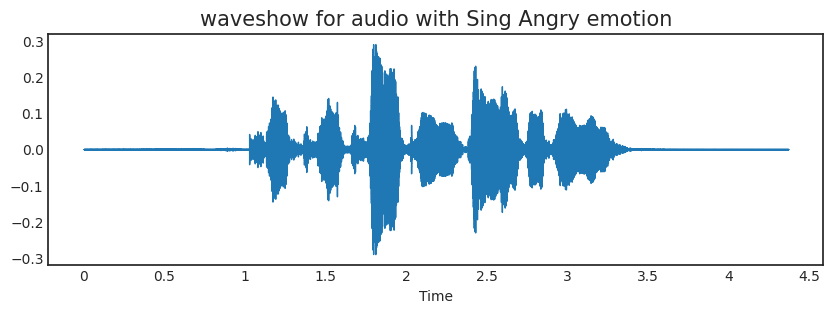

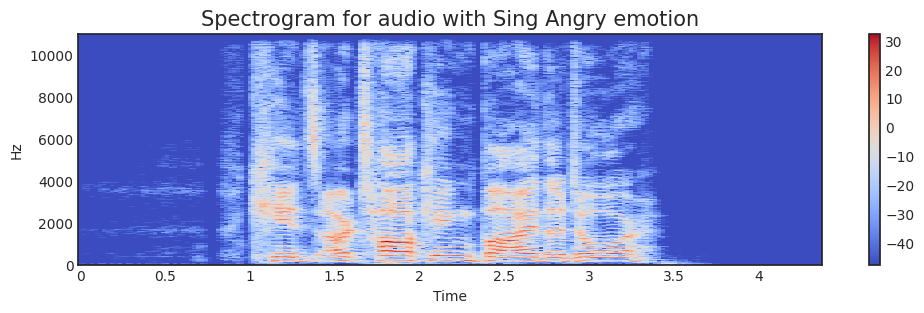

In [19]:
emotion='Sing Angry'
path = '../input/ravdess-emotional-song-audio/Actor_01/03-02-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveshow(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

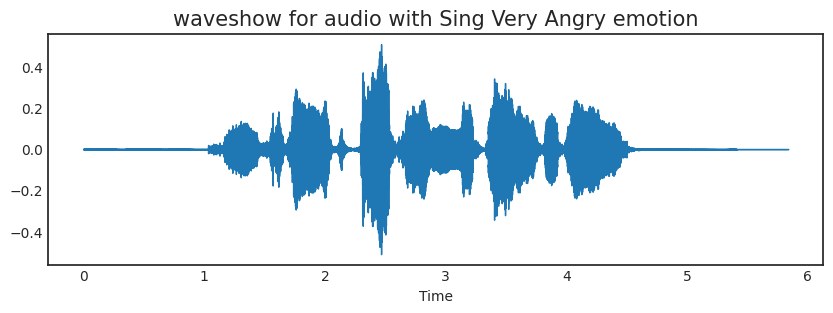

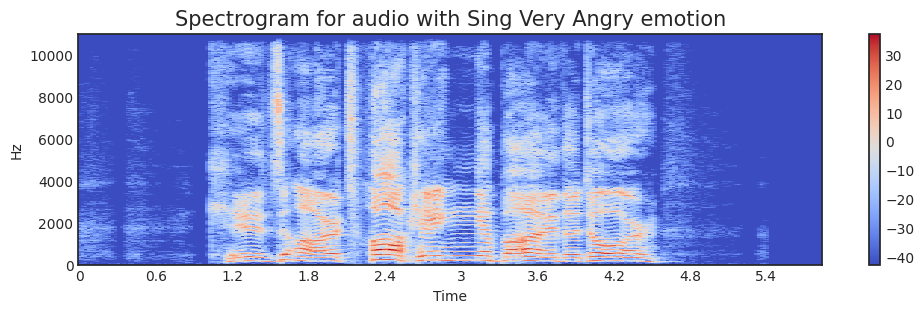

In [20]:
emotion='Sing Very Angry' 
path = '../input/ravdess-emotional-song-audio/Actor_01/03-02-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveshow(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [21]:
def noise(data):
    noise_amp = 0.04*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data, rate)


def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.8):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

# taking any example and checking for techniques.
path = path = '../input/ravdess-emotional-speech-audio/Actor_01/03-01-05-01-01-01-01.wav'
data, sample_rate = librosa.load(path)

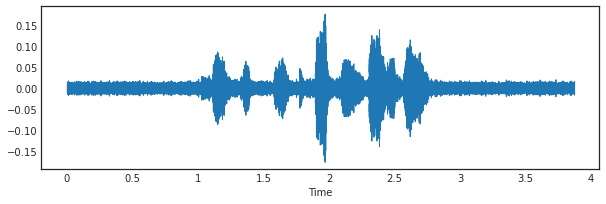

In [ ]:
plt.figure(figsize=(10,3))
x = noise(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Pass rate=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  import sys


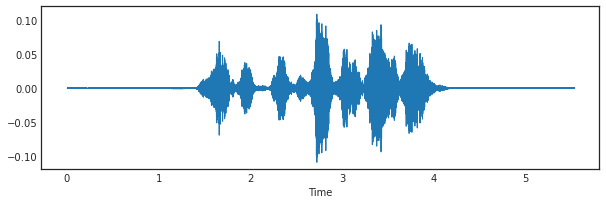

In [ ]:

plt.figure(figsize=(10,3))
x = stretch(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

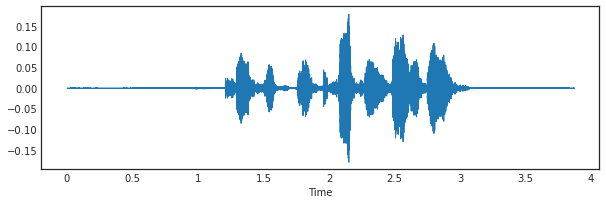

In [ ]:
plt.figure(figsize=(10,3))
x = shift(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Pass sr=22050, n_steps=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


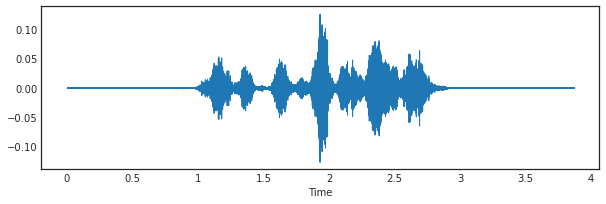

In [ ]:
plt.figure(figsize=(10,3))
x = pitch(data, sample_rate)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Pass rate=1.25 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  app.launch_new_instance()


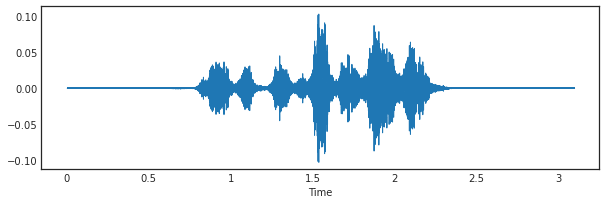

In [ ]:
plt.figure(figsize=(10,3))
x = higher_speed(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Pass rate=0.75 as keyword args. From version 0.10 passing these as positional arguments will result in an error


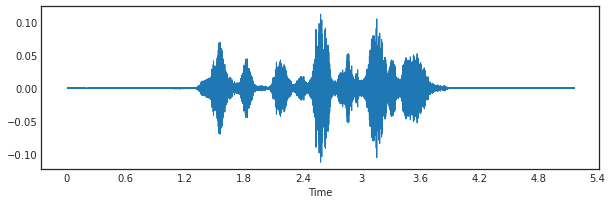

In [ ]:
plt.figure(figsize=(10,3))
x = lower_speed(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# <center> Feature Extraction</center>

In [28]:
DATA_FRAMES = True
fem_path = '../input/features/Female_features.csv'
mal_path = '../input/features/Male_features.csv'

In [29]:
#sample_rate = 22050

def extract_features(data):
    
    result = np.array([])
  
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=34)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)
     
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast') 
    
    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))
    
    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))
    
    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((
         result, res5)) 
    
    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))
    
    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))
    
    return result

In [30]:
if not DATA_FRAMES:
    
    female_X, female_Y = [], []
    for path, emotion in zip(Females.path, Females.labels):
        features = get_features(path)
        #adding augmentation, get_features return a multi dimensional array (for each augmentation), so we have to use a loop to fill the df
        for elem in features: 
            female_X.append(elem)        
            female_Y.append(emotion)
    

    male_X, male_Y = [], []
    for path, emotion in zip(Males.path, Males.labels):
        features = get_features(path)
        for elem in features:
            male_X.append(elem)
            male_Y.append(emotion)
            
    print(f'Check shapes:\nFemale features: {len(female_X)}, labels: {len(female_Y)}\nMale features:   {len(male_X)}, labels: {len(male_Y)}')

In [31]:
def setup_dataframe(gender, features, labels):
    df = pd.DataFrame(features)
    df['labels'] = labels
    df.to_csv(f'{gender}_features.csv', index=False)
    
    print(f'{gender} dataframe')
    df.sample(frac=1).head()
    
    return df

In [32]:
if not DATA_FRAMES:
    Females_Features = setup_dataframe('Female', female_X, female_Y)
else:
    Females_Features = pd.read_csv(fem_path)

In [33]:
if not DATA_FRAMES:
    Males_Features = setup_dataframe('Male', male_X, male_Y)
else:
    Males_Features = pd.read_csv(mal_path)

In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [35]:
female_X = Females_Features.iloc[: ,:-1].values
female_Y = Females_Features['labels'].values

male_X = Males_Features.iloc[: ,:-1].values
male_Y = Males_Features['labels'].values

In [36]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()

female_Y = encoder.fit_transform(np.array(female_Y).reshape(-1,1)).toarray()
male_Y = encoder.fit_transform(np.array(male_Y).reshape(-1,1)).toarray()

In [37]:
print(female_Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [42]:
import pickle

# Saving the encoder
with open("/kaggle/working/encoder1.pkl", "wb") as file:
    pickle.dump(encoder, file)


In [43]:
x_trainF, x_testF, y_trainF, y_testF = train_test_split(female_X, female_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((39379, 58), (39379, 8), (9845, 58), (9845, 8))

In [44]:
x_trainM, x_testM, y_trainM, y_testM = train_test_split(male_X, male_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((28728, 58), (28728, 8), (7182, 58), (7182, 8))

In [45]:
scaler = StandardScaler()


x_trainF = scaler.fit_transform(x_trainF)
x_testF = scaler.transform(x_testF)

x_trainM = scaler.fit_transform(x_trainM)
x_testM = scaler.transform(x_testM)

In [46]:
x_trainF = np.expand_dims(x_trainF, axis=2)
x_testF = np.expand_dims(x_testF, axis=2)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((39379, 58, 1), (39379, 8), (9845, 58, 1), (9845, 8))

In [47]:
x_trainM = np.expand_dims(x_trainM, axis=2)
x_testM = np.expand_dims(x_testM, axis=2)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((28728, 58, 1), (28728, 8), (7182, 58, 1), (7182, 8))

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, AveragePooling1D
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [49]:
## To check if a system has the necessary GPU resources available to train our large models
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [50]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 1


In [51]:
with strategy.scope():
    def build_model(in_shape):
        model=Sequential()
        model.add(Conv1D(256, kernel_size=6, strides=1, padding='same', activation='relu', input_shape=(in_shape, 1)))
        model.add(BatchNormalization())
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
        model.add(Dropout(0.2))

        model.add(Conv1D(64, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))
    
        model.add(Flatten())
        model.add(Dense(units=32, activation='relu'))
        model.add(Dropout(0.3))

        model.add(Dense(units=8, activation='softmax'))
        model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
    
        return model


        


In [52]:
print(x_trainF.shape[0],x_trainF.shape[1],x_trainF.shape[2])

39379 58 1


In [53]:
def model_build_summary(mod_dim, tr_features, val_features, val_labels):
    model = build_model(mod_dim)
    model.summary()
    
    score = model.evaluate(val_features, val_labels, verbose = 1)
    accuracy = 100*score[1]
    
    return model

In [54]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=4, min_lr=0.000001)

batch_size = 32
n_epochs = 100

In [55]:
def show_graphs(history):
    epochs = [i for i in range(n_epochs)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

In [56]:

num_classes = 8
female_model = model_build_summary(x_trainF.shape[1], x_trainF, x_testF, y_testF)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 58, 256)           1792      
                                                                 
 batch_normalization (BatchN  (None, 58, 256)          1024      
 ormalization)                                                   
                                                                 
 average_pooling1d (AverageP  (None, 29, 256)          0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 batch_normalization_1 (Batc  (None, 29, 128)          512       
 hNormalization)                                                 
                                                        

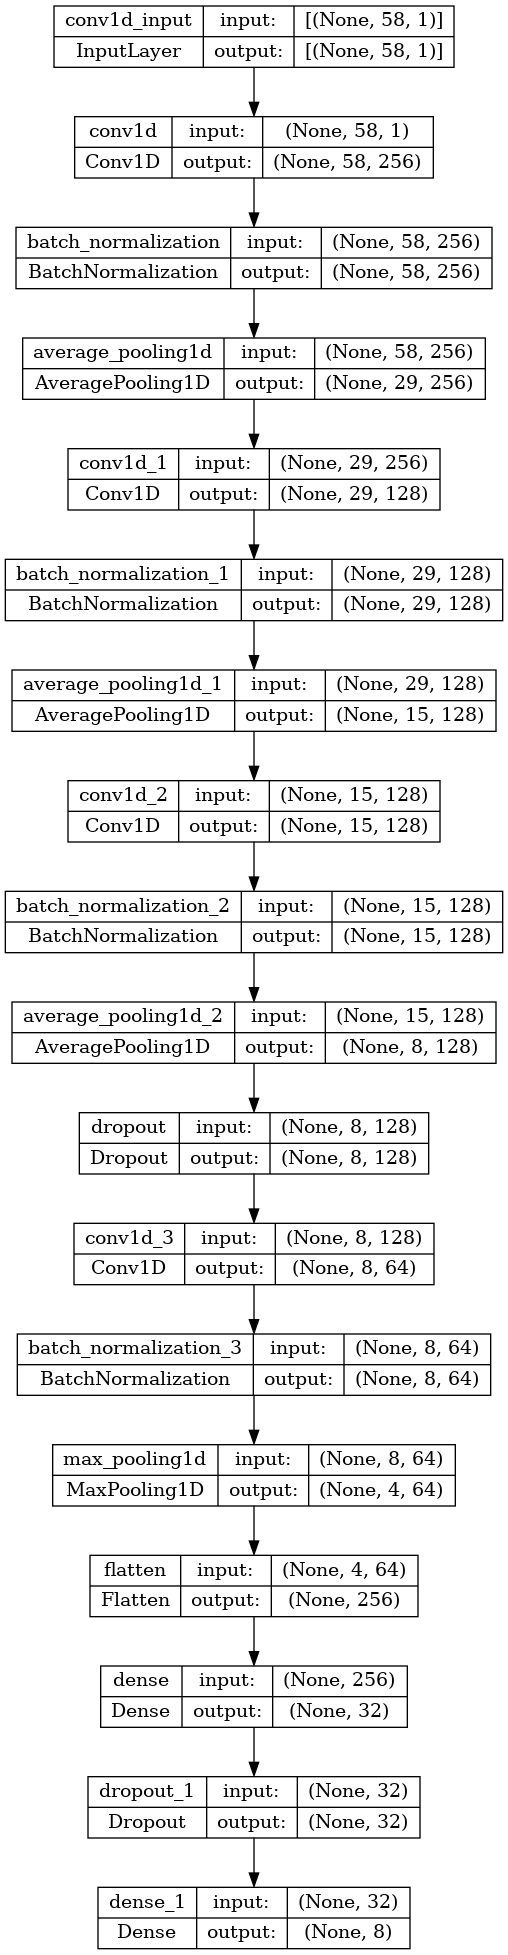

In [57]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(female_model, to_file='convnet1.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet1.png')

In [58]:
# Save model architecture as JSON
model_json = female_model.to_json()
with open("/kaggle/working/female_model_RCNN.json", "w") as json_file:
    json_file.write(model_json)


print("Model saved successfully!")


Model saved successfully!


In [59]:
male_model = model_build_summary(x_trainM.shape[1], x_trainM, x_testM, y_testM)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 58, 256)           1792      
                                                                 
 batch_normalization_4 (Batc  (None, 58, 256)          1024      
 hNormalization)                                                 
                                                                 
 average_pooling1d_3 (Averag  (None, 29, 256)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_5 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 batch_normalization_5 (Batc  (None, 29, 128)          512       
 hNormalization)                                                 
                                                      

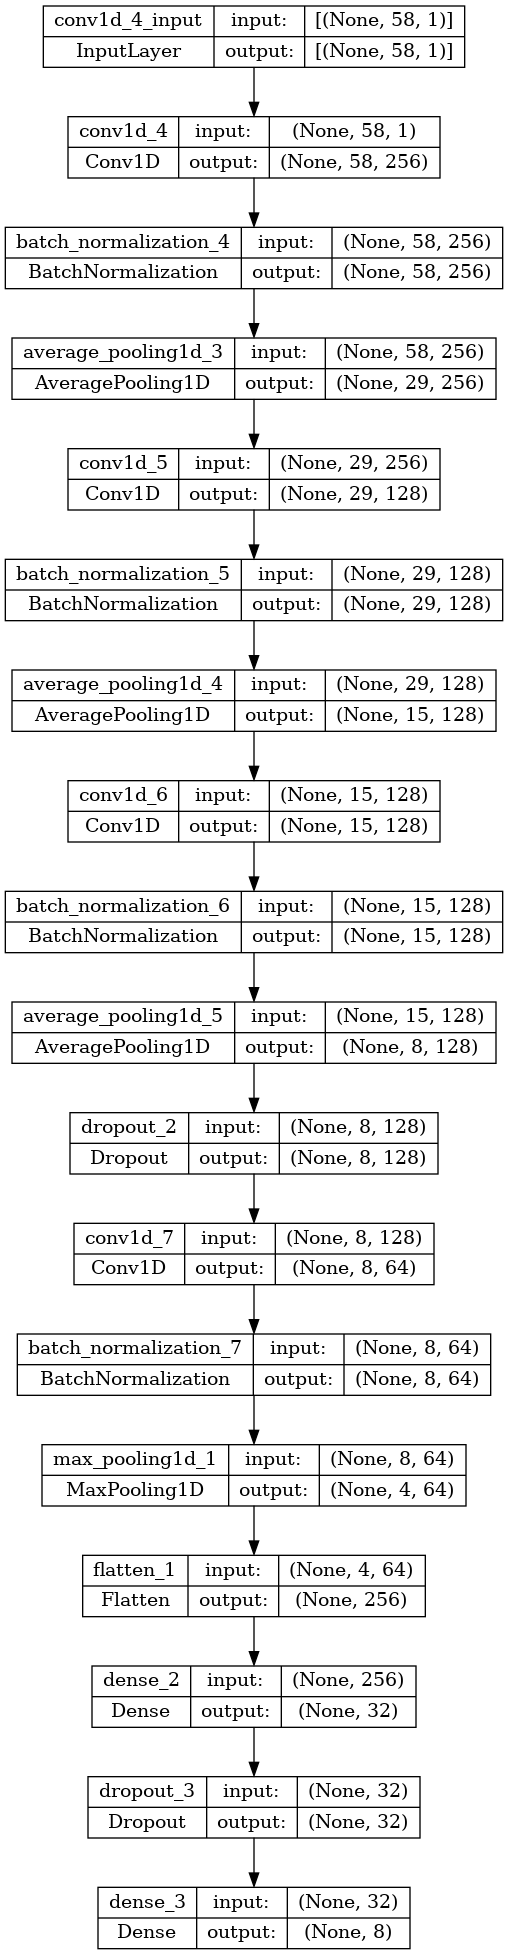

In [60]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(male_model, to_file='convnet2.png', show_shapes=True,show_layer_names=True)


In [61]:
# Save model architecture as JSON
model_json = male_model.to_json()
with open("/kaggle/working/male_model_RCNN.json", "w") as json_file:
    json_file.write(model_json)


print("Model saved successfully!")


Model saved successfully!


In [62]:
checkpointer1 = ModelCheckpoint(filepath='/kaggle/working/female_model_CNN_BN_34MFCC_weights.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
female_history = female_model.fit(x_trainF, y_trainF, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testF, y_testF), callbacks=[rlrp,checkpointer1])

Epoch 1/100
1231/1231 [==============================] - ETA: 0s - loss: 1.1476 - accuracy: 0.5441
Epoch 1: val_accuracy improved from -inf to 0.63677, saving model to /kaggle/working/female_model_CNN_BN_34MFCC_weights.hdf5
1231/1231 [==============================] - 17s 9ms/step - loss: 1.1476 - accuracy: 0.5441 - val_loss: 0.9057 - val_accuracy: 0.6368 - lr: 0.0010
Epoch 2/100
1231/1231 [==============================] - ETA: 0s - loss: 0.9156 - accuracy: 0.6300
Epoch 2: val_accuracy improved from 0.63677 to 0.67669, saving model to /kaggle/working/female_model_CNN_BN_34MFCC_weights.hdf5
1231/1231 [==============================] - 12s 9ms/step - loss: 0.9156 - accuracy: 0.6300 - val_loss: 0.7959 - val_accuracy: 0.6767 - lr: 0.0010
Epoch 3/100
1230/1231 [============================>.] - ETA: 0s - loss: 0.8299 - accuracy: 0.6640
Epoch 3: val_accuracy improved from 0.67669 to 0.70899, saving model to /kaggle/working/female_model_CNN_BN_34MFCC_weights.hdf5
1231/1231 [=================

In [63]:
checkpointer2 = ModelCheckpoint(filepath='/kaggle/working/male_model_CNN_BN_34MFCC_weights.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
male_history = male_model.fit(x_trainM, y_trainM, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testM, y_testM), callbacks=[rlrp,checkpointer2])

Epoch 1/100
898/898 [==============================] - ETA: 0s - loss: 1.6725 - accuracy: 0.3240
Epoch 1: val_accuracy improved from -inf to 0.41339, saving model to /kaggle/working/male_model_CNN_BN_34MFCC_weights.hdf5
898/898 [==============================] - 12s 9ms/step - loss: 1.6725 - accuracy: 0.3240 - val_loss: 1.4441 - val_accuracy: 0.4134 - lr: 0.0010
Epoch 2/100
897/898 [============================>.] - ETA: 0s - loss: 1.4774 - accuracy: 0.4059
Epoch 2: val_accuracy improved from 0.41339 to 0.46811, saving model to /kaggle/working/male_model_CNN_BN_34MFCC_weights.hdf5
898/898 [==============================] - 8s 9ms/step - loss: 1.4771 - accuracy: 0.4061 - val_loss: 1.3428 - val_accuracy: 0.4681 - lr: 0.0010
Epoch 3/100
892/898 [============================>.] - ETA: 0s - loss: 1.3826 - accuracy: 0.4499
Epoch 3: val_accuracy improved from 0.46811 to 0.49234, saving model to /kaggle/working/male_model_CNN_BN_34MFCC_weights.hdf5
898/898 [==============================] - 8s

In [67]:
score = female_model.evaluate(x_trainF,y_trainF, verbose = 0)
print("Female emotions training Accuracy: {0:.2%}".format(score[1]))

score = female_model.evaluate(x_testF, y_testF, verbose=0)
print("Female emotions testing Accuracy: {0:.2%}".format(score[1]))

Female emotions training Accuracy: 99.98%
Female emotions testing Accuracy: 95.08%


In [68]:
# predicting on test data.
predF_test = female_model.predict(x_testF)
y_predF = encoder.inverse_transform(predF_test)
y_testF = encoder.inverse_transform(y_testF)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_predF.flatten()
df['Actual Labels'] = y_testF.flatten()

df.head(15)

308/308 [==============================] - 1s 3ms/step


Predicted Labels Actual Labels
0             happy         happy
1           neutral       neutral
2           disgust       neutral
3             angry         angry
4           disgust       disgust
5           neutral       neutral
6             angry         happy
7           disgust       disgust
8           neutral       neutral
9           neutral           sad
10            angry         angry
11            happy         happy
12          disgust       disgust
13         surprise      surprise
14              sad           sad

In [69]:
print(classification_report(y_testF, y_predF))

              precision    recall  f1-score   support

       angry       0.94      0.97      0.96      1574
        calm       0.95      0.98      0.97       119
     disgust       0.96      0.92      0.94      1545
        fear       0.95      0.96      0.96      1531
       happy       0.95      0.95      0.95      1531
     neutral       0.95      0.95      0.95      1335
         sad       0.94      0.94      0.94      1527
    surprise       0.99      0.99      0.99       683

    accuracy                           0.95      9845
   macro avg       0.95      0.96      0.96      9845
weighted avg       0.95      0.95      0.95      9845



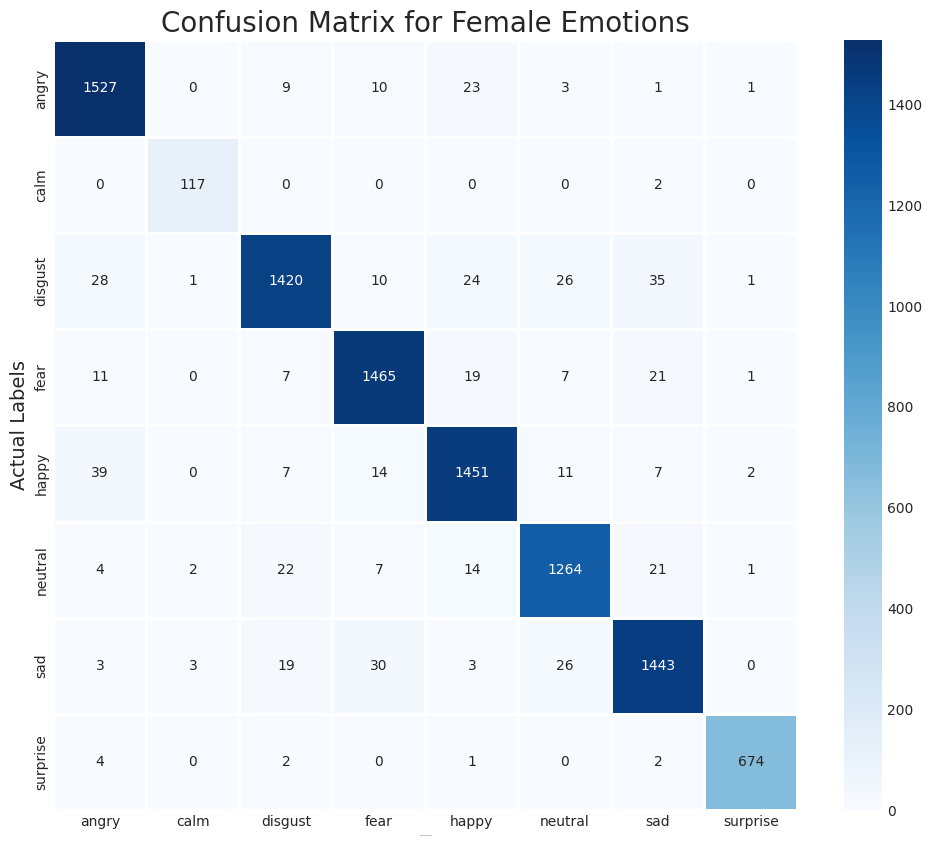

In [70]:
cm = confusion_matrix(y_testF, y_predF)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Female Emotions', size=20)
plt.xlabel('Predicted Labels', size=1)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [71]:
score = male_model.evaluate(x_trainM,y_trainM, verbose = 0)
print("Male emotions training Accuracy: {0:.2%}".format(score[1]))

score = male_model.evaluate(x_testM, y_testM, verbose=0)
print("Male emotions testing Accuracy: {0:.2%}".format(score[1]))

Male emotions training Accuracy: 99.98%
Male emotions testing Accuracy: 90.71%


In [72]:
# predicting on test data.
predM_test = male_model.predict(x_testM)
y_predM = encoder.inverse_transform(predM_test)
y_testM = encoder.inverse_transform(y_testM)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_predM.flatten()
df['Actual Labels'] = y_testM.flatten()

df.head(15)

225/225 [==============================] - 1s 2ms/step


Predicted Labels Actual Labels
0             angry         angry
1           neutral       neutral
2               sad           sad
3              fear          fear
4               sad           sad
5               sad           sad
6              fear          fear
7           neutral       neutral
8             happy         happy
9           disgust       disgust
10            angry         angry
11          disgust       disgust
12         surprise      surprise
13              sad           sad
14          disgust       disgust

In [73]:
print(classification_report(y_testM, y_predM))


              precision    recall  f1-score   support

       angry       0.92      0.94      0.93      1194
        calm       0.94      0.99      0.96       134
     disgust       0.89      0.89      0.89      1139
        fear       0.89      0.90      0.90      1140
       happy       0.89      0.90      0.89      1117
     neutral       0.92      0.89      0.90      1055
         sad       0.91      0.91      0.91      1160
    surprise       0.97      0.96      0.96       243

    accuracy                           0.91      7182
   macro avg       0.92      0.92      0.92      7182
weighted avg       0.91      0.91      0.91      7182



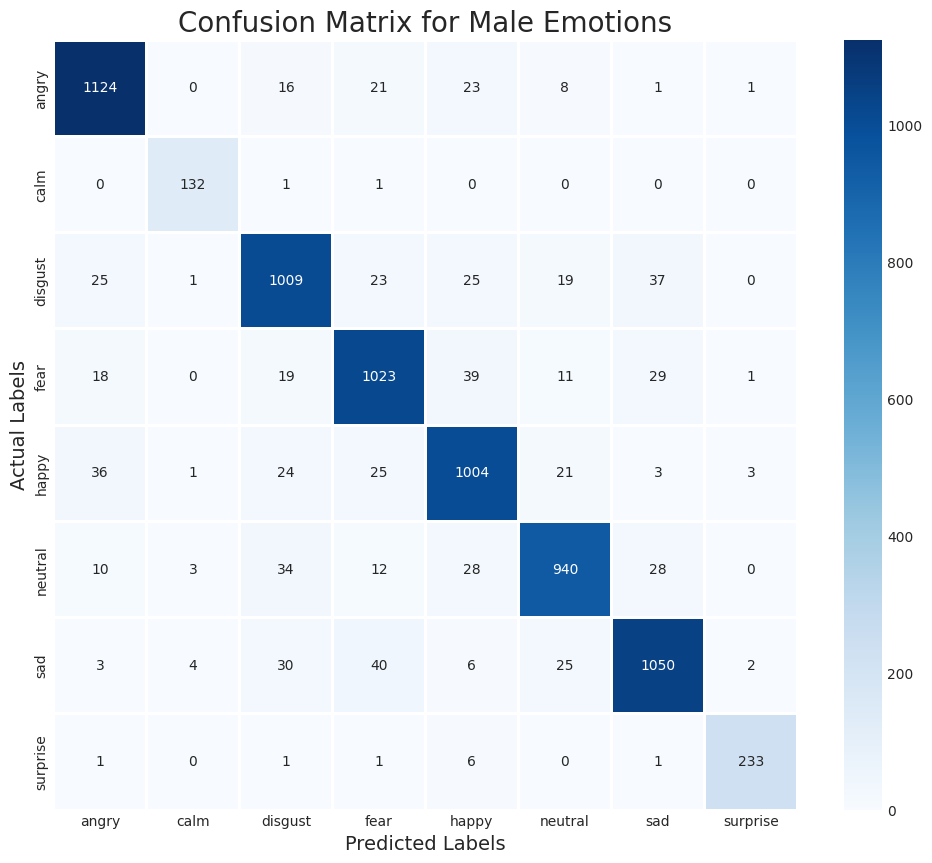

In [74]:
cm = confusion_matrix(y_testM, y_predM)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Male Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [75]:
# show_graphs(history)

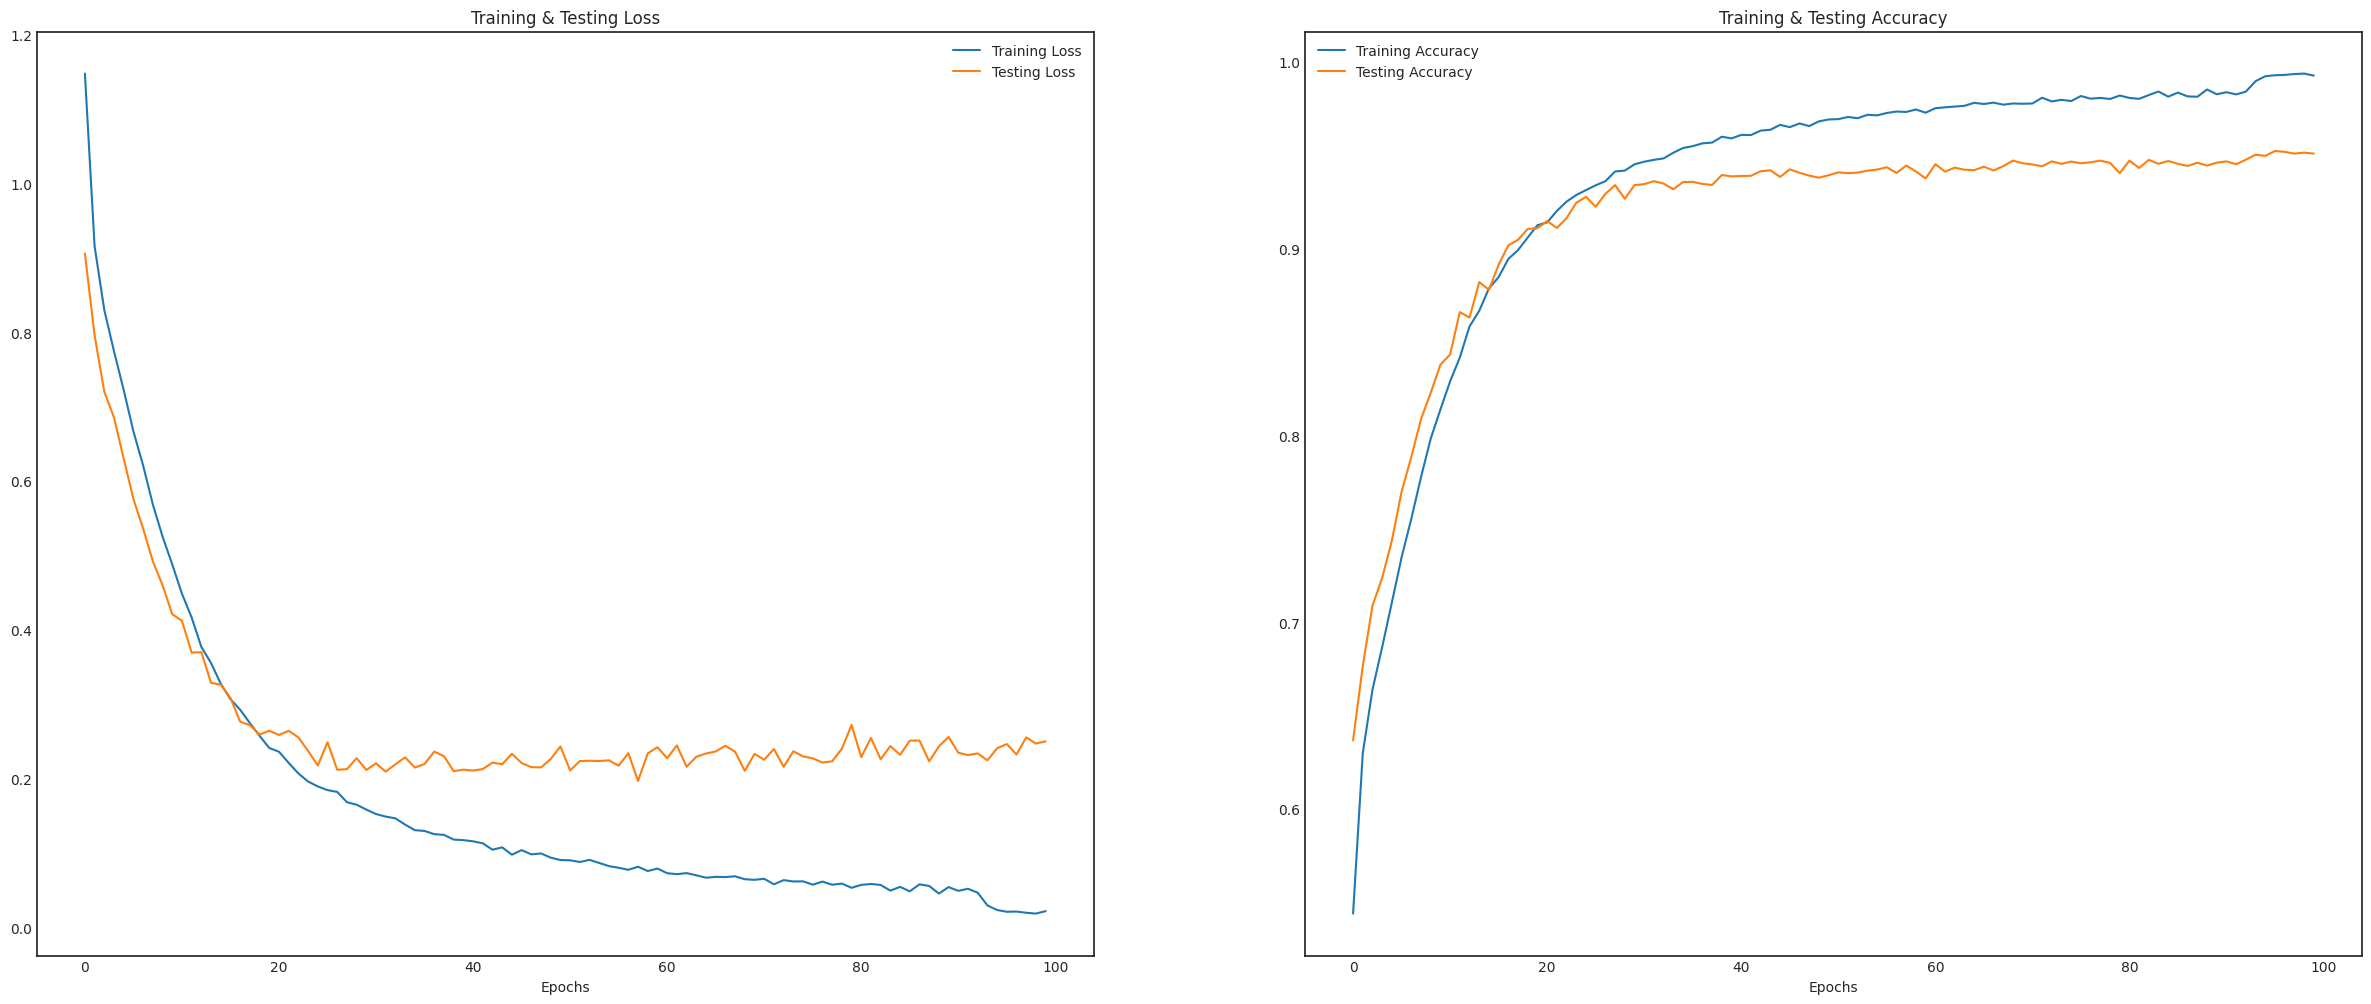

In [76]:
show_graphs(female_history)

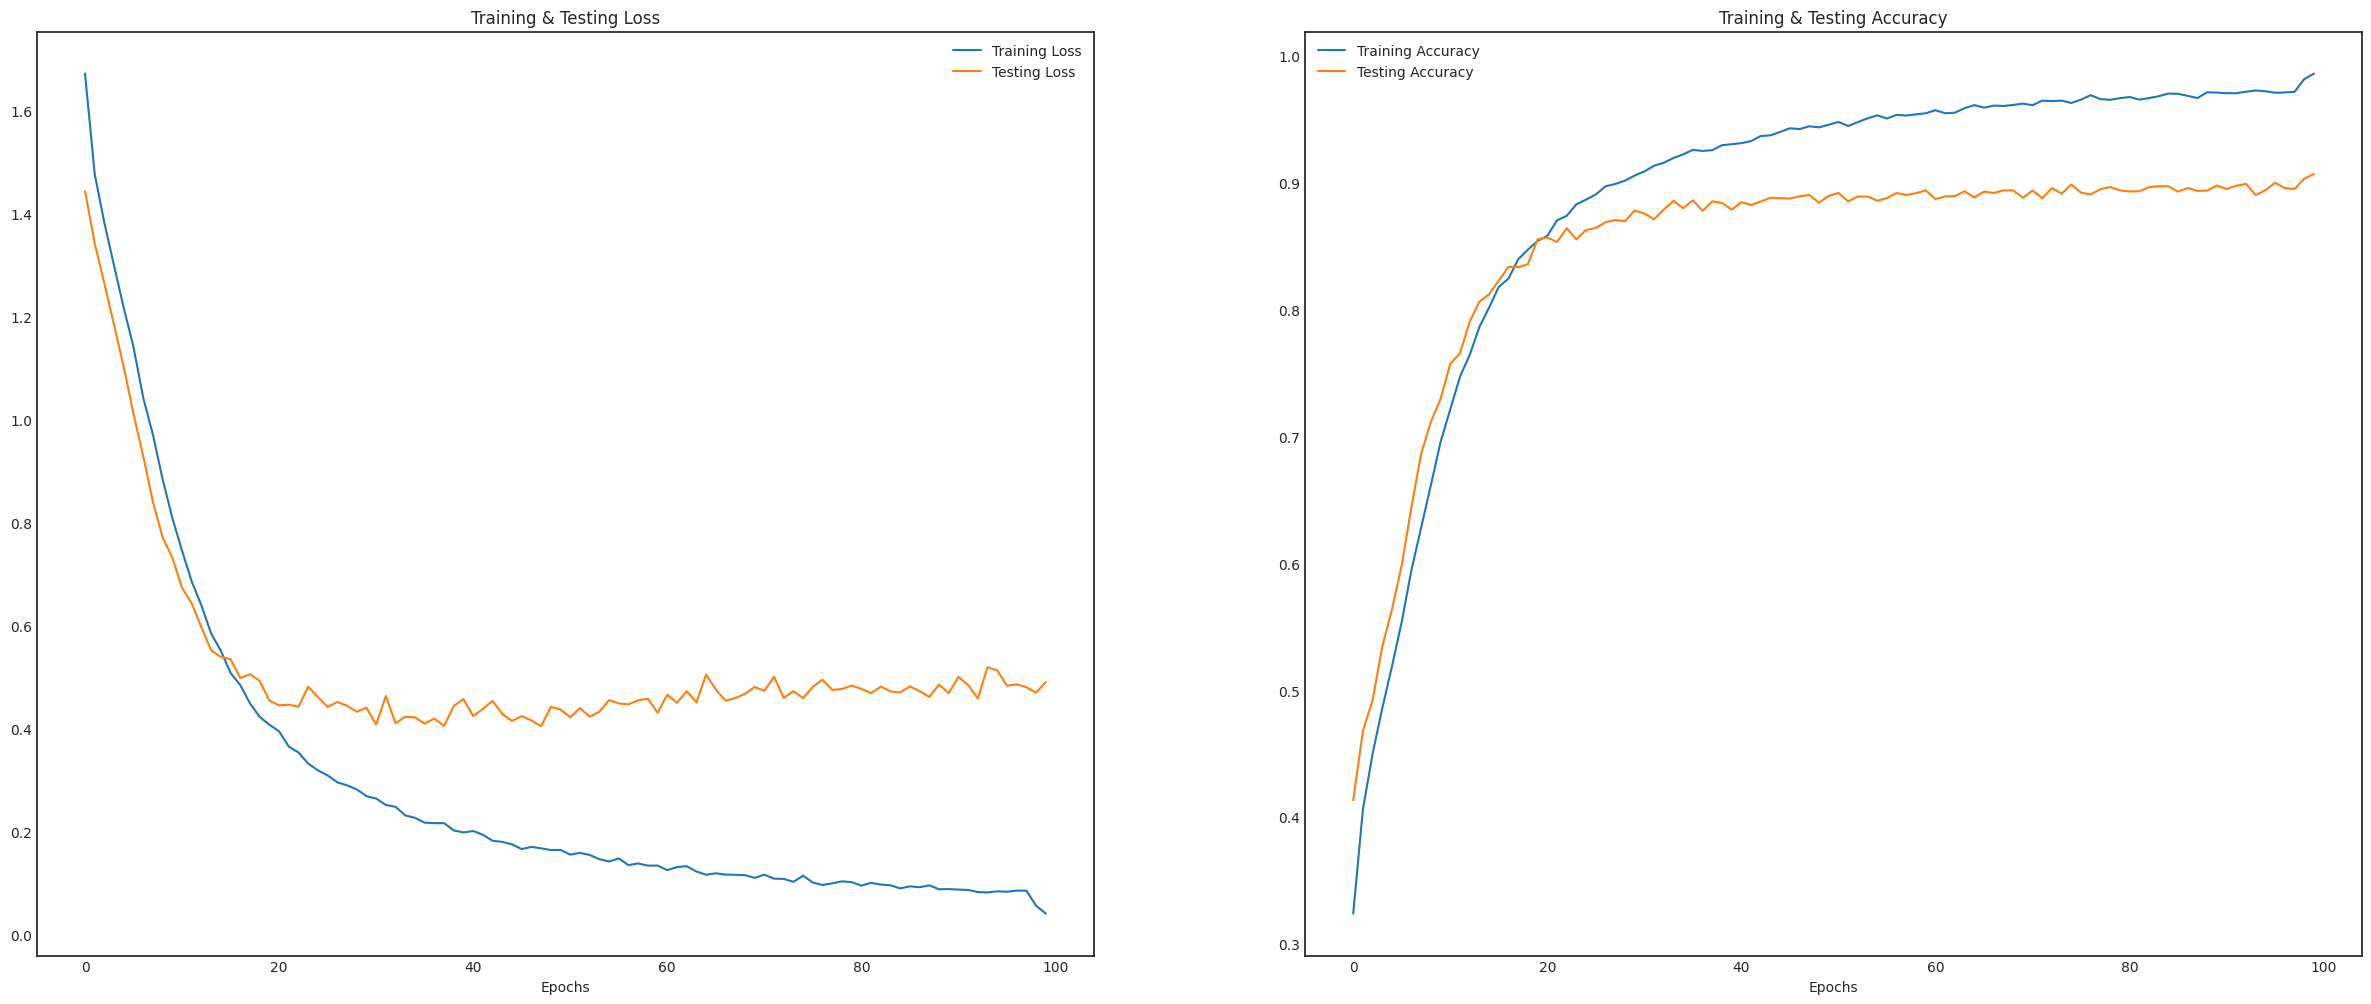

In [77]:
show_graphs(male_history)